## Visualize and Analyze EDX data

In [109]:
from functions import *

#### visualize quickly a map - only works if you have coordinates written

In [ ]:
folder = r"O:\Nlab\Public\DCH-plasma\phosphosulfides_students\Students\Giulia\01_Characterization\layerprobe\anait_0001_BaS_Zr"
filepath = os.path.join(folder, "anait_0001_BR.xlsx")
new_heatmap("Layer 1 Ba Atomic %", filepath=filepath, title = "anait_0001_BR", 
#savepath = os.path.join(folder, "test.html")
)

#### rename SE images, if needed

In [ ]:
# folderpath= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\EDX\mittma_0023_FL"
rename_SE_images(folderpath)

### Add coordinates to excel files

In [114]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0018_Cu_glass\EDX\excels"
filename= "mittma_0018_B" # without extension

# if no coordinates were written for this file, but only magnification, spacing, nrow, ncolumns - returns coordinates in the sample
#EDX_coordinates(folder, filename, edge=4)

# if coordinates for 3 points were written, and you want the stage coordinates (for uploading to nomad)
#EDX_stage_coords(folder, filename)

#if coordinates for 3 points were written, and you want the sample coordinates (for further processing locally)
EDX_sample_coords(folder, filename)

#if all coordinates were written, and you want to translate them to sample coordinates (for further processing locally)
#lp_translate_excel(folder, filename) 

mittma_0018_B  - coordinates calculated, translated and saved


In [ ]:
#if more files are done at the same time, and you want to translate them all
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\anait_0005_Ba\EDS"
sample = "anait_0005_Ba"
pos = [ "BR",
        #"FR",
        #"FL", 
        "BL"
        ]
names = [sample+"_"+p for p in pos]

# for i in range(0,len(pos)): #uncomment the one you need
for name in names:
    # EDX_coordinates(folder, name, edge=4)
#   EDX_stage_coords(folder, name)
    EDX_sample_coords(folder, name)
    # lp_translate_excel(folder, name)

### loading data from excels file

In [115]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0018_Cu_glass\EDX\excels"
sample_n = 18

sample = "mittma_0018"
# pos = [ "BR",
#         "FR",
#         "FL", 
#         "BL"
#         ]
pos= ['B']
names = [sample+"_"+p for p in pos]

load the data

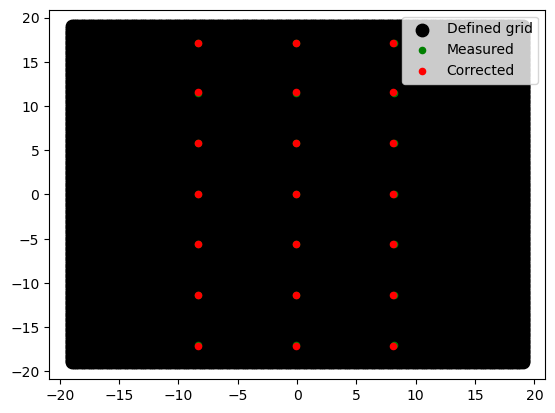

In [116]:
datas = [pd.DataFrame() for _ in pos]

for i in range(0,len(pos)):
    file = sample+"_"+pos[i]+"_sample_coords.xlsx" #change to coords, sample_coords, stage_coords, translated as needed
    filepath = os.path.join(folder, file)
    # grid = measurement_grid(200,200,38,38,-19,-19)
    grid = measurement_grid(200,200,38,38,-19,-19)
    datas[i], coords = read_layerprobe(filepath, grid, sheetname="Sheet1")
    plt.figure()
    plot_grid(coords, grid)

# data__BR, coords_BR = translate_data(datas[0], 20,20)
# data__FR, coords_FR = translate_data(datas[1], 20,-20)
# data__FL, coords_FL = translate_data(datas[2], -20,-20)
# data__BL, coords_BL = translate_data(datas[3], -20,20)

# data = combine_data(( data__BR,
#                     data__FR,
#                      data__FL, 
#                       data__BL
#                     ))
# data0= data.copy()



#### add a column with sample ID to the data, and export to pickles


In [ ]:
# headerlength = len(data0.columns.get_level_values(1).unique())
# k=0
# data = data0.copy()
# for i in range(0, len(data.columns.get_level_values(0).unique())):
#     #print(data.columns.get_level_values(0).unique()[i])
#     data.insert(headerlength*(i+1)+k, "{}".format(data.columns.get_level_values(0).unique()[i]), sample_n, allow_duplicates=True)
#     data.rename(columns={'': 'Sample ID'}, inplace = True)
#     k=k+1
# new_data = data.copy()
# print(data.columns.get_level_values(1))
# display(new_data)

In [117]:
data0= datas[0].copy()
sample_dict = {'Sample ID': [sample_n]*len(data0.columns.get_level_values(0).unique())}
sample_df = add_info(data0, sample_dict)

display(sample_df)

Coordinate          -8.31,-17.09                          \
Data type  Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                          100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          300.42              12.82              48.63   

Coordinate                                        -8.31,-11.36  \
Data type  Layer 1 Cu Atomic % Sample ID Substrate Si Atomic %   
0                        38.55        18                 100.0   

Coordinate                                                 ...  \
Data type  Layer 1 Density (g/cm³) Layer 1 Thickness (nm)  ...   
0                             4.33                 294.38  ...   

Coordinate         8.12,11.55                                \
Data type  Layer 1 S Atomic % Layer 1 Cu Atomic % Sample ID   
0                       49.13               39.04        18   

Coordinate            8.12,17.09                          \
Data type  Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                          100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          287.65              11.63              50.25   

Coordinate                                
Data type  Layer 1 Cu Atomic % Sample ID  
0                        38.13        18  

[1 rows x 147 columns]

In [118]:
#%% ------------------export pickle to use elsewhere ---------------------

pickle_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\mittma_pickles" # change to your pickle path
with open(os.path.join(pickle_path, sample+"_EDS.pkl"), 'wb') as f:
    pickle.dump(sample_df, f)

In [105]:
# ------------------import pickle to use here ---------------------
sample= 'mittma_0023'
with open(os.path.join(pickle_path, sample+"_EDS.pkl"), 'rb') as f:
    data = pickle.load(f)

-35.56 -9.21
-24.87 -9.21
-4.630000000000001 2.34
4.4399999999999995 -37.66
        x      y
0    4.44   2.34
1    4.44   2.34
2    4.44   2.34
3    4.44   2.34
4    4.44   2.34
..    ...    ...
667 -4.63  37.85
668 -4.63  37.85
669 -4.63  37.85
670 -4.63  37.85
671 -4.63  37.85

[672 rows x 2 columns]


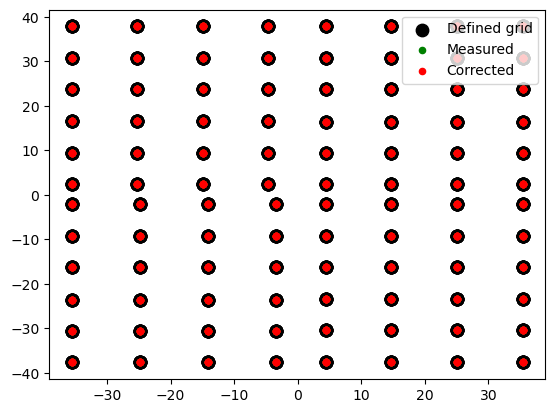

In [107]:
# x,y=extract_coordinates(sample_df)
grid = MI_to_grid(data)
points= [[-40,-10], [-25,-10], [-5,-40], [5,-40]]
get_x= []
get_y= []
for point in points:
    xx, yy= closest_coord(grid, point[0], point[1])
    print(xx,yy)
    get_x.append(xx)
    get_y.append(yy)
# xx, yy= closest_coord(grid, -4.63, -2.53)
# print(get_x, get_y)
# print(grid)
# plot_grid(grid, grid)

Layer 1 P Atomic % data at all coordinates.
Layer 1 P Atomic % data at all coordinates.
Layer 1 S Atomic % data at all coordinates.
Layer 1 S Atomic % data at all coordinates.
Layer 1 Cu Atomic % data at all coordinates.
Layer 1 Cu Atomic % data at all coordinates.


,X,Y
0,-4.63,2.34


All data at -4.630000000000001,2.34.


Data type,Substrate Si Atomic %,Layer 1 Density (g/cm³),Layer 1 Thickness (nm),Layer 1 P Atomic %,Layer 1 S Atomic %,Layer 1 Cu Atomic %,Sample ID
0,100.0,4.33,45.81,17.42,9.55,73.03,23


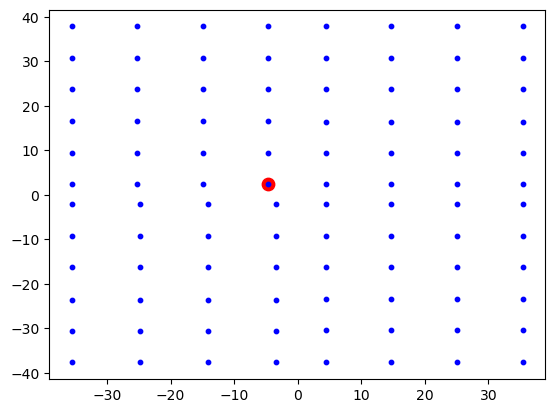

In [108]:
# for point in points:
#     test=get_data(sample_df, x= point[0], y= point[1])
#     display(test)
sample_df= data.copy()

idx_P_max= np.where(get_data(sample_df, type= 'Layer 1 P Atomic %').values[0] >17)[0]
idx_P_min= np.where(get_data(sample_df, type='Layer 1 P Atomic %').values[0] <19)[0]
idx_P= np.intersect1d(idx_P_max, idx_P_min)

idx_S_min= np.where(get_data(sample_df, type= 'Layer 1 S Atomic %').values[0] <10)[0]
idx_S_max= np.where(get_data(sample_df, type= 'Layer 1 S Atomic %').values[0] >8)[0]
idx_S= np.intersect1d(idx_S_max, idx_S_min)

idx_Cu_min= np.where(get_data(sample_df, type= 'Layer 1 Cu Atomic %').values[0] >70)[0]
idx_Cu_max= np.where(get_data(sample_df, type= 'Layer 1 Cu Atomic %').values[0] <75)[0]
idx_Cu= np.intersect1d(idx_Cu_max, idx_Cu_min)

idx= np.intersect1d(idx_P, idx_S)
idx= np.intersect1d(idx, idx_Cu)
x,y= extract_coordinates(sample_df)
good_comp= {'X': [], 'Y': []}
for i in range(0,len(idx)):
    good_comp['X'].append(x[idx[i]])
    good_comp['Y'].append(y[idx[i]])
    # display(get_data(sample_df, type= 'Layer 1 P Atomic %', x= x[idx[i]], y= y[idx[i]]))
good_comp= pd.DataFrame(good_comp)
display(good_comp)
gx,gy = extract_coordinates(sample_df)
plt.scatter(good_comp['X'], good_comp['Y'], c='r', s=80)
plt.scatter(gx,gy, c='b', s=10)

for i in range(0,len(good_comp)):
    display(get_data(sample_df, x= good_comp['X'][i], y= good_comp['Y'][i]))
# display(get_data(sample_df, x= good_comp['X'], y= good_comp['Y']))

#### plot heatmaps for the whole sample (combined)

In [120]:
#plot for the whole sample
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 

#coordinates to exclude: 
grid = MI_to_grid(sample_df)
xx, yy= closest_coord(grid, -4.63, -2.53)
print(xx,yy)

for datatype in datatypes:
    savepath = os.path.join(folder, f"{sample} {datatype}.png")
    new_heatmap(datatype, data=data0, title = f"{sample} {datatype}",
            # exclude=[f'{xx},{yy}'],
    savepath=savepath,
     )

-8.31 0.1


In [90]:
# calculate ratios
# data0= math_on_columns(data0, "Layer 1 Ba Atomic %", "Layer 1 P Atomic %", "/")
# data0.rename(columns={'Layer 1 Ba Atomic % / Layer 1 P Atomic %': 'Ba/P'}, inplace=True)
# display(data0)

data_1= math_on_columns(data0, "Layer 1 P Atomic %", "Layer 1 S Atomic %", "/")
data_1.rename(columns={'Layer 1 P Atomic % / Layer 1 S Atomic %': 'P/S'}, inplace=True)
data_1= math_on_columns(data_1, "Layer 1 S Atomic %", "Layer 1 Cu Atomic %", "/")
data_1.rename(columns={'Layer 1 S Atomic % / Layer 1 Cu Atomic %': 'S/Cu'}, inplace=True)
data_1= math_on_columns(data_1, "Layer 1 P Atomic %", "Layer 1 Cu Atomic %", "/")
data_1.rename(columns={'Layer 1 P Atomic % / Layer 1 Cu Atomic %': 'P/Cu'}, inplace=True)
data_1= math_on_columns(data_1, "Layer 1 Cu Atomic %", "Layer 1 Thickness (nm)", "/")
data_1.rename(columns={'Layer 1 Cu Atomic % / Layer 1 Thickness (nm)': 'Cu/Thickness'}, inplace=True)
data_1= math_on_columns(data_1, "Layer 1 S Atomic %", "Layer 1 Thickness (nm)", "/")
data_1.rename(columns={'Layer 1 S Atomic % / Layer 1 Thickness (nm)': 'S/Thickness'}, inplace=True)
data_1= math_on_columns(data_1, "Layer 1 P Atomic %", "Layer 1 Thickness (nm)", "/")
data_1.rename(columns={'Layer 1 P Atomic % / Layer 1 Thickness (nm)': 'P/Thickness'}, inplace=True)
display(data_1)
# print(data_1.columns.get_level_values(0).unique())

Coordinate 4.4399999999999995,2.34                          \
Data type    Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                            100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           98.43               9.14              19.59   

Coordinate                                                                ...  \
Data type  Layer 1 Cu Atomic %       P/S     S/Cu      P/Cu Cu/Thickness  ...   
0                        71.27  0.466565  0.27487  0.128245     0.724068  ...   

Coordinate -5.199999999999999,37.09                                        \
Data type    Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                            140.55               8.19              19.29   

Coordinate                                                                 \
Data type  Layer 1 Cu Atomic %       P/S      S/Cu      P/Cu Cu/Thickness   
0                        72.53  0.424572  0.265959  0.112919     0.516044   

Coordinate                          
Data type  S/Thickness P/Thickness  
0             0.137247    0.058271  

[1 rows x 1152 columns]

In [91]:
os.makedirs(os.path.join(folder, "ratios"), exist_ok=True)
to_plot= ["P/S","S/Cu", "P/Cu", "Cu/Thickness", "S/Thickness", "P/Thickness"]
names = ['P_S_ratio', 'S_Cu_ratio','P_Cu_ratio',  'Cu_Thickness_ratio', 'S_Thickness_ratio', 'P_Thickness_ratio']


for i in range (0, len(to_plot)):
    datatype = to_plot[i]
    name = names[i]
    savepath = os.path.join(folder,'ratios', f"{sample} {name}.png")
    new_heatmap(datatype, data=data_1, title = f"{sample} {datatype}",
            exclude=[f'{xx},{yy}'],
    savepath=savepath,
     )
    

# savepath = os.path.join(folder, f"{sample}_B_P_ratio.html")
# new_heatmap('Ba/P', data=data0, title = f"{sample} Ba/P ",
#     savepath=savepath,
#      )

#### plot a heatmap for each single sample

In [ ]:
#plot for single samples
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 
#exclude= ['-16.14,-18.24']

for i in range(len(datas)): 
    for datatype in datatypes:
        savepath = os.path.join(folder,"plots", f"{sample}_{pos[i]} {datatype}.png")
        new_heatmap(datatype, data=datas[i], title = f"{sample}_{pos[i]} {datatype}",
        savepath=savepath,
        #exclude =exclude
        )

In [ ]:
data_FL = math_on_columns(datas[1], "Layer 1 P Atomic %", "Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 P Atomic % / Layer 1 S Atomic %': 'Bulk P/S ratio '}, inplace = True)
data_FL = math_on_columns(data_FL, "Layer 1 P Atomic %", "Layer 1 S Atomic %", "+")
data_FL = math_on_columns(data_FL, "Layer 1 Cu Atomic %", "Layer 1 P Atomic % + Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 Cu Atomic % / Layer 1 P Atomic % + Layer 1 S Atomic %': 'Bulk Cu/anions ratio'}, inplace = True)

display(data_FL)
new_heatmap("Bulk Cu/anions ratio", data=data_FL, title = f"{sample}_FL Bulk Cu/anions ratio",savepath= os.path.join(folderpath, f"{sample}_FL Bulk Cu_anions ratio.png"))

### code in progress

Load .txt file with SE image details into an image_dict. 
May be useful if you again copy image info

In [64]:
file_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\anait_0004_Ba\EDX\anait_0004_BL\coordinates.txt"
# Initialize a dictionary to store the data
image_dict = {}

# Regular expressions to capture the relevant lines
image_pattern = re.compile(r'Label:\s*Electron Image (\d+)')
stage_x_pattern = re.compile(r'Stage X:\s*([-+]?[0-9]*\.?[0-9]+)mm')
stage_y_pattern = re.compile(r'Stage Y:\s*([-+]?[0-9]*\.?[0-9]+)mm')

# Variables to temporarily store the current image and its coordinates
current_image = None
x_coordinate = None
y_coordinate = None

# Read the file and extract the data
with open(file_path, 'r') as file:
    for line in file:
        # Find image number
        image_match = image_pattern.search(line)
        if image_match:
            # If we have a previous image and its coordinates, store them in the dictionary
            if current_image is not None and x_coordinate is not None and y_coordinate is not None:
                image_dict[current_image] = [x_coordinate, y_coordinate]

            # Start a new image
            current_image = int(image_match.group(1))
            x_coordinate = None
            y_coordinate = None

        # Find Stage X
        stage_x_match = stage_x_pattern.search(line)
        if stage_x_match:
            x_coordinate = float(stage_x_match.group(1))

        # Find Stage Y
        stage_y_match = stage_y_pattern.search(line)
        if stage_y_match:
            y_coordinate = float(stage_y_match.group(1))

    # Store the last image and its coordinates after exiting the loop
    if current_image is not None and x_coordinate is not None and y_coordinate is not None:
        image_dict[current_image] = [x_coordinate, y_coordinate]

# Show the dictionary
print(image_dict)


{1: [-14.587, -15.856], 2: [-14.545, -9.252], 6: [-14.381, 17.161], 7: [-4.982, -15.916], 8: [-4.94, -9.312], 19: [14.228, -16.036], 24: [14.434, 16.982]}


In [65]:
# save info from images 1-2-7
ncolumns = 4
nrows = 6
mag= 30000

#accurate "grid vectors"
a = [image_dict[7][0] - image_dict[1][0], image_dict[7][1] - image_dict[1][1]]
b = [image_dict[2][0] - image_dict[1][0], image_dict[2][1] - image_dict[1][1]]

# grid vectors from first corner
space_x = image_dict[7][0] - image_dict[1][0]
space_y = image_dict[2][1] - image_dict[1][1]

#grid vectors from furthest points
spacing_x = (image_dict[19][0] - image_dict[1][0])/(ncolumns-1)
spacing_y = (image_dict[6][1] - image_dict[1][1])/(nrows-1)

#grid vector from point 24, making a square
size_x = image_dict[24][0] - image_dict[1][0]
size_y = image_dict[24][1] - image_dict[1][1]
spacex_div = size_x/(ncolumns-1)
spacey_div = size_y/(nrows-1)

startx= image_dict[1][0]
starty= image_dict[1][1]

area_x = 13.7*30/mag
area_y = 9.4*30/mag

x,y=[],[]
for key in image_dict:
    x.append(image_dict[key][0])
    y.append(image_dict[key][1])


In [66]:

def get_coords(A,B, startx, starty, ncolumns, nrows):
    coord_x = np.round(np.linspace(startx,startx+A*(ncolumns-1), ncolumns), 2)
    coord_y = np.round(np.linspace(starty, starty+B*(nrows-1), nrows), 2)
    X=[]
    Y=[]
    for j in range(0, ncolumns):
        for i in range(0, nrows):
            Y.append(coord_y[i])
            X.append(coord_x[j])
    return X,Y

X_1619,Y_1619 = get_coords(spacing_x,spacing_y, startx, starty, ncolumns, nrows)
X_127,Y_127 = get_coords(space_x,space_y, startx, starty, ncolumns, nrows)
X_24,Y_24 = get_coords(spacex_div,spacey_div, startx, starty, ncolumns, nrows)

Text(0, 0.5, 'Y coordinate (mm)')

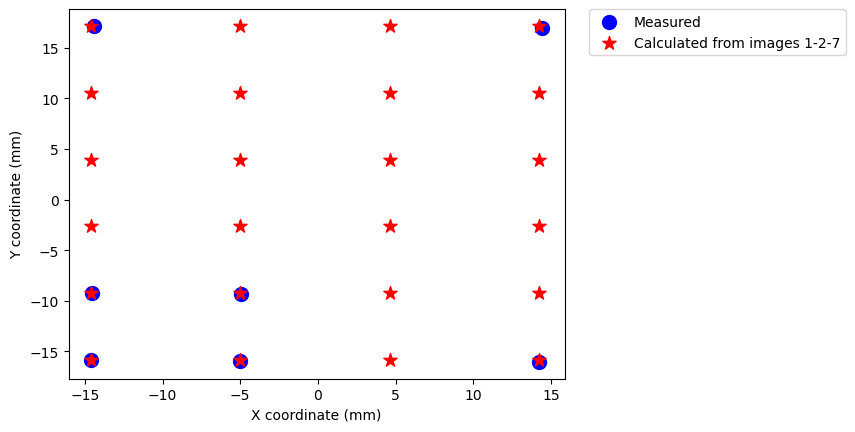

In [68]:
#plt.scatter(X_1619, Y_1619, color='green', label="Calculated from furthest points", s=100)
plt.scatter(x, y, color='blue', label="Measured", s=100)
plt.scatter(X_127, Y_127, color='red', marker='*', label="Calculated from images 1-2-7", s=100) # as in EDX_stage_coords
#plt.scatter(X_24, Y_24, color='pink', marker='x', label="Calculated from image 24", s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("X coordinate (mm)")
plt.ylabel("Y coordinate (mm)")

In [ ]:
folder= r"C:\Users\s222531\OneDrive - Danmarks Tekniske Universitet\MASTER_PROJECT_PHOSPHOSULFIDES\results\anait_0004_Ba"
filename= "anait_0004_BR"

EDX_stage_coords(folder,filename)

EDX_sample_coords(folder,filename)

##### get statistics

In [ ]:
def stats(data_all, type):
    data = get_data(data_all, type = type)
    data = data.sort_values(by = 0, axis=1 )
    min_= data.iloc[0,0]
    max_ = data.iloc[0,-1]
    mean_ = data.mean(axis=1)[0]

    data = pd.DataFrame([min_, max_, mean_], index = ["min","max", "mean"])
    return data

S = get_data(data, type = "Layer 1 S Atomic %")
S=S.sort_values(by = 0, axis=1 )

S_min= S.iloc[0,0]
S_max = S.iloc[0,-1]
S_mean = S.mean(axis=1)[0]

S_data = pd.DataFrame([ S_min, S_max, S_mean,], index = ["min","max", "mean"])


In [ ]:
Cu_data = stats(data, "Layer 1 Cu Atomic %")
P_data = stats(data, "Layer 1 P Atomic %")
S_data = stats(data, "Layer 1 S Atomic %")

results = pd.concat([Cu_data, P_data, S_data], axis=1)
results.columns = ["Cu", "P", "S"]

ratio0 = results.loc["mean", "Cu"]/results.loc["mean", "P"]
ratio2 = results.loc["mean", "S"]/results.loc["mean", "P"]

##### interpolate data to another grid

In [92]:
EDS_data_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\mittma_pickles"
with open(os.path.join(EDS_data_path, "mittma_0022_EDS.pkl"), 'rb') as f:
    data_EDS = pickle.load(f)

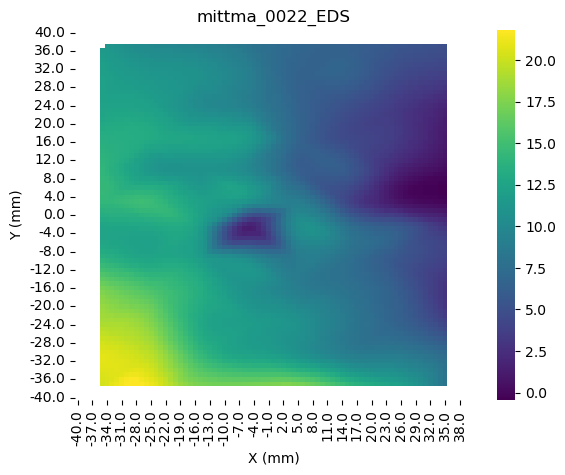

In [103]:
coords_EDS= extract_coordinates(data_EDS)
grid= measurement_grid(81,81, 80,80, -40, -40)

EDS_interp = interpolate_grid(data_EDS, grid)
# plt.scatter(coords_EDS[0], coords_EDS[1], c='r', s=80)
# plt.scatter(coords['X'], coords['Y'], c='b', s=10)

heatmap(EDS_interp, "Layer 1 P Atomic %")

In [104]:
x,y= select_points(EDS_interp,y_max=-34,x_min=0, x_max= 9)